# Import Libaraies

In [186]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay,cohen_kappa_score
from sklearn.metrics import make_scorer


# Reading and Exploring Data

In [26]:
data=pd.read_csv('/Users/mojgun/Documents/IRONHACK/Final Project/Dropout or Academic Success/Data/Data_Base(Modeified).csv')

In [27]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [28]:
data.shape

(4424, 37)

In [29]:
#looking fo Nan Values
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [30]:
#Modifiying Column names
data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace("'s","")

# Dividing Categorical and Numerical 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mother_qualification                            4424 non-null   int64  
 9   father_qualification                     

In [32]:
# find out the number of value for each fild based on the meta data of data base most of these features are Categorical Nominal
for i in range (len(data.columns)):
    print(data.iloc[:,[i]].value_counts())
    print('*'*50)


marital_status
1                 3919
2                  379
4                   91
5                   25
6                    6
3                    4
dtype: int64
**************************************************
application_mode
1                   1708
17                   872
39                   785
43                   312
44                   213
7                    139
18                   124
42                    77
51                    59
16                    38
53                    35
15                    30
5                     16
10                    10
2                      3
26                     1
27                     1
57                     1
dtype: int64
**************************************************
application_order
1                    3026
2                     547
3                     309
4                     249
5                     154
6                     137
0                       1
9                       1
dtype: int64
*************

target  
Graduate    3003
Dropout     1421
dtype: int64
**************************************************


''' 
Based On EXploring data These features are numercial 
gdp
inflation_rate,
unemployment_rate,
curricular_units_2nd_sem_(without_evaluations
curricular_units_2nd_sem_(grade)
curricular_units_2nd_sem_(approved)
curricular_units_2nd_sem_(evaluations)
curricular_units_2nd_sem_(enrolled)
curricular_units_2nd_sem_(credited)
curricular_units_1st_sem_(without_evaluations)
curricular_units_1st_sem_(without_evaluations)
curricular_units_1st_sem_(grade)
curricular_units_1st_sem_(approved)
curricular_units_1st_sem_(evaluations)
curricular_units_1st_sem_(enrolled)
curricular_units_1st_sem_(credited)
age_at_enrollment
admission_grade
previous_qualification_(grade)
previous_qualification

In [33]:
data.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
  

In [34]:
# Change Type of Others to Objects
data[['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance','nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
        'displaced', 'educational_special_needs', 'debtor','tuition_fees_up_to_date',
        'gender', 'scholarship_holder', 'international']] = data[['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance','nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
        'displaced', 'educational_special_needs', 'debtor','tuition_fees_up_to_date',
        'gender', 'scholarship_holder', 'international']].astype('object')


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   object 
 1   application_mode                                4424 non-null   object 
 2   application_order                               4424 non-null   object 
 3   course                                          4424 non-null   object 
 4   daytime/evening_attendance                      4424 non-null   object 
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   object 
 8   mother_qualification                            4424 non-null   object 
 9   father_qualification                     

# Divide Numercial and Categorical

In [36]:
num=data.select_dtypes(np.number)
cat=data.select_dtypes('object')


In [37]:
num.shape

(4424, 19)

In [38]:
cat.shape

(4424, 18)

In [39]:
list(num.columns)

['previous_qualification',
 'previous_qualification_(grade)',
 'admission_grade',
 'age_at_enrollment',
 'curricular_units_1st_sem_(credited)',
 'curricular_units_1st_sem_(enrolled)',
 'curricular_units_1st_sem_(evaluations)',
 'curricular_units_1st_sem_(approved)',
 'curricular_units_1st_sem_(grade)',
 'curricular_units_1st_sem_(without_evaluations)',
 'curricular_units_2nd_sem_(credited)',
 'curricular_units_2nd_sem_(enrolled)',
 'curricular_units_2nd_sem_(evaluations)',
 'curricular_units_2nd_sem_(approved)',
 'curricular_units_2nd_sem_(grade)',
 'curricular_units_2nd_sem_(without_evaluations)',
 'unemployment_rate',
 'inflation_rate',
 'gdp']

# Numericals

## Find Multicollinearity in Numricals

In [40]:
considered_features = list(num.columns)
def compute_vif(considered_features):
    X = num[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
5,curricular_units_1st_sem_(enrolled),23.528216
11,curricular_units_2nd_sem_(enrolled),16.442303
4,curricular_units_1st_sem_(credited),15.747238
7,curricular_units_1st_sem_(approved),12.676006
10,curricular_units_2nd_sem_(credited),12.399341
13,curricular_units_2nd_sem_(approved),10.154983
14,curricular_units_2nd_sem_(grade),5.479099
8,curricular_units_1st_sem_(grade),4.980663
6,curricular_units_1st_sem_(evaluations),3.976740
12,curricular_units_2nd_sem_(evaluations),3.330090


## Removing Multicollinearity

In [41]:
considered_features.remove('curricular_units_1st_sem_(enrolled)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
4,curricular_units_1st_sem_(credited),12.656257
9,curricular_units_2nd_sem_(credited),11.405488
6,curricular_units_1st_sem_(approved),11.223404
12,curricular_units_2nd_sem_(approved),9.615539
13,curricular_units_2nd_sem_(grade),5.453835
7,curricular_units_1st_sem_(grade),4.884174
10,curricular_units_2nd_sem_(enrolled),3.529162
5,curricular_units_1st_sem_(evaluations),3.432251
11,curricular_units_2nd_sem_(evaluations),3.177420
8,curricular_units_1st_sem_(without_evaluations),1.677744


In [42]:
considered_features.remove('curricular_units_1st_sem_(credited)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_1166/3876592948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
11,curricular_units_2nd_sem_(approved),8.773690
5,curricular_units_1st_sem_(approved),8.762912
12,curricular_units_2nd_sem_(grade),5.430531
6,curricular_units_1st_sem_(grade),4.650342
9,curricular_units_2nd_sem_(enrolled),3.509112
4,curricular_units_1st_sem_(evaluations),3.285054
8,curricular_units_2nd_sem_(credited),3.211705
10,curricular_units_2nd_sem_(evaluations),3.139909
7,curricular_units_1st_sem_(without_evaluations),1.677152
2,admission_grade,1.602561


In [43]:
considered_features.remove('curricular_units_2nd_sem_(approved)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_1166/3876592948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
5,curricular_units_1st_sem_(approved),5.857220
6,curricular_units_1st_sem_(grade),4.525994
11,curricular_units_2nd_sem_(grade),3.832838
4,curricular_units_1st_sem_(evaluations),3.278628
8,curricular_units_2nd_sem_(credited),3.181203
9,curricular_units_2nd_sem_(enrolled),3.134100
10,curricular_units_2nd_sem_(evaluations),3.038389
7,curricular_units_1st_sem_(without_evaluations),1.676292
2,admission_grade,1.599957
12,curricular_units_2nd_sem_(without_evaluations),1.567375


In [44]:
considered_features.remove('curricular_units_1st_sem_(approved)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/var/folders/_z/gw3f_k0d08zctss1m54yb4pc0000gn/T/ipykernel_1166/3876592948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


,Variable,VIF
5,curricular_units_1st_sem_(grade),3.767078
10,curricular_units_2nd_sem_(grade),3.484976
4,curricular_units_1st_sem_(evaluations),3.262878
9,curricular_units_2nd_sem_(evaluations),3.031362
8,curricular_units_2nd_sem_(enrolled),2.686019
7,curricular_units_2nd_sem_(credited),2.206704
6,curricular_units_1st_sem_(without_evaluations),1.675945
2,admission_grade,1.599179
11,curricular_units_2nd_sem_(without_evaluations),1.558737
1,previous_qualification_(grade),1.542052


In [45]:
#Drop multiculinarity from Numerical
num=num.drop(['curricular_units_1st_sem_(enrolled)',
             'curricular_units_1st_sem_(credited)',
             'curricular_units_2nd_sem_(approved)',
             'curricular_units_1st_sem_(approved)'],axis=1)

## Removing Outliers

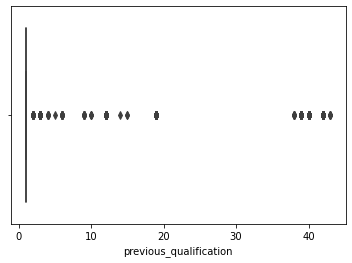

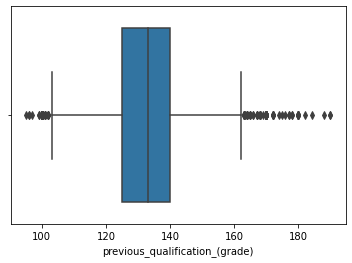

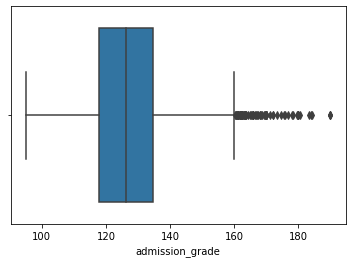

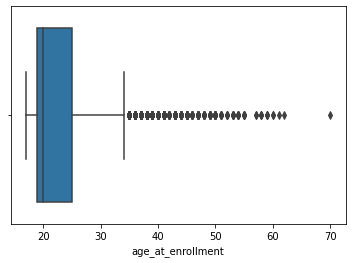

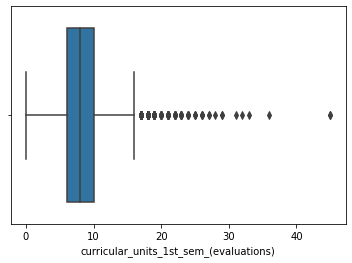

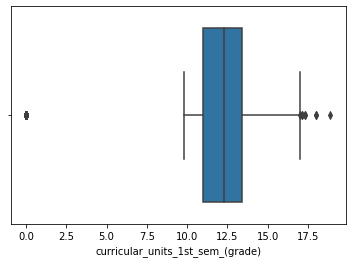

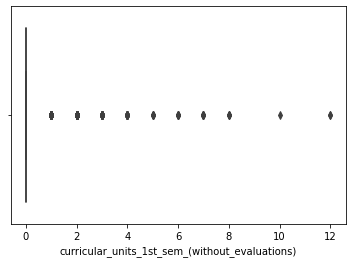

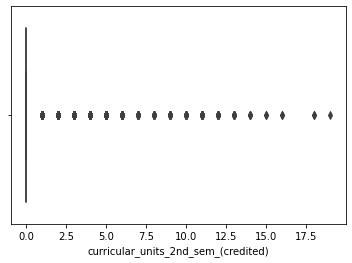

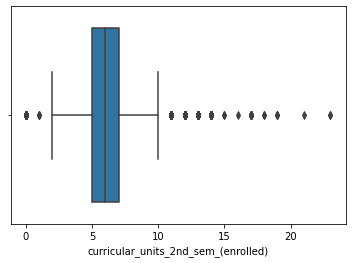

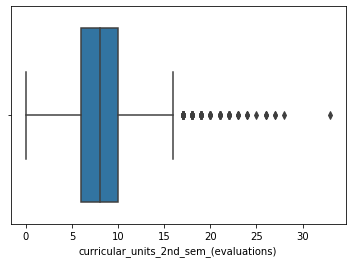

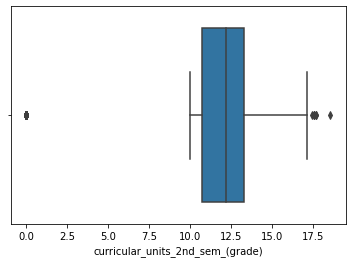

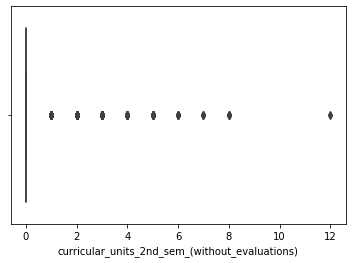

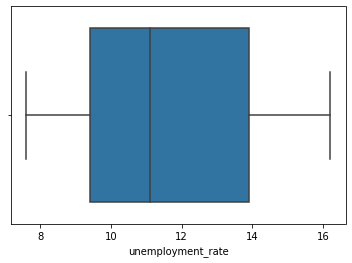

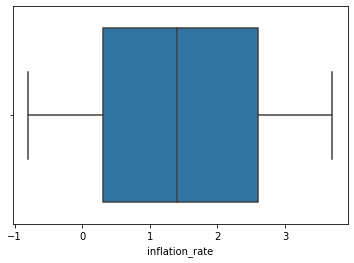

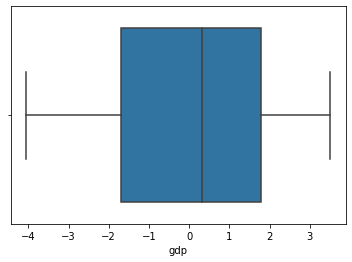

In [46]:
def plot_num(df):
    col=list(df.columns)
    for i in range(len(col)):
        sns.boxplot(x =df[col[i]], data = df) 
        plt.show()
plot_num(num)

In [47]:
# Age
num[num['age_at_enrollment']>65]['age_at_enrollment'].value_counts()
num=num[num['age_at_enrollment']<=65]
num.shape

(4423, 15)

In [48]:
num.columns

Index(['previous_qualification', 'previous_qualification_(grade)',
       'admission_grade', 'age_at_enrollment',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate',
       'inflation_rate', 'gdp'],
      dtype='object')

# Categorical

In [49]:
def plot_cat(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(15,25))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        chart=sns.countplot(x=df[col[i]],data=df,ax=ax[j,k])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        k=k+1
        if k>=2:
            j=j+1
            k=0

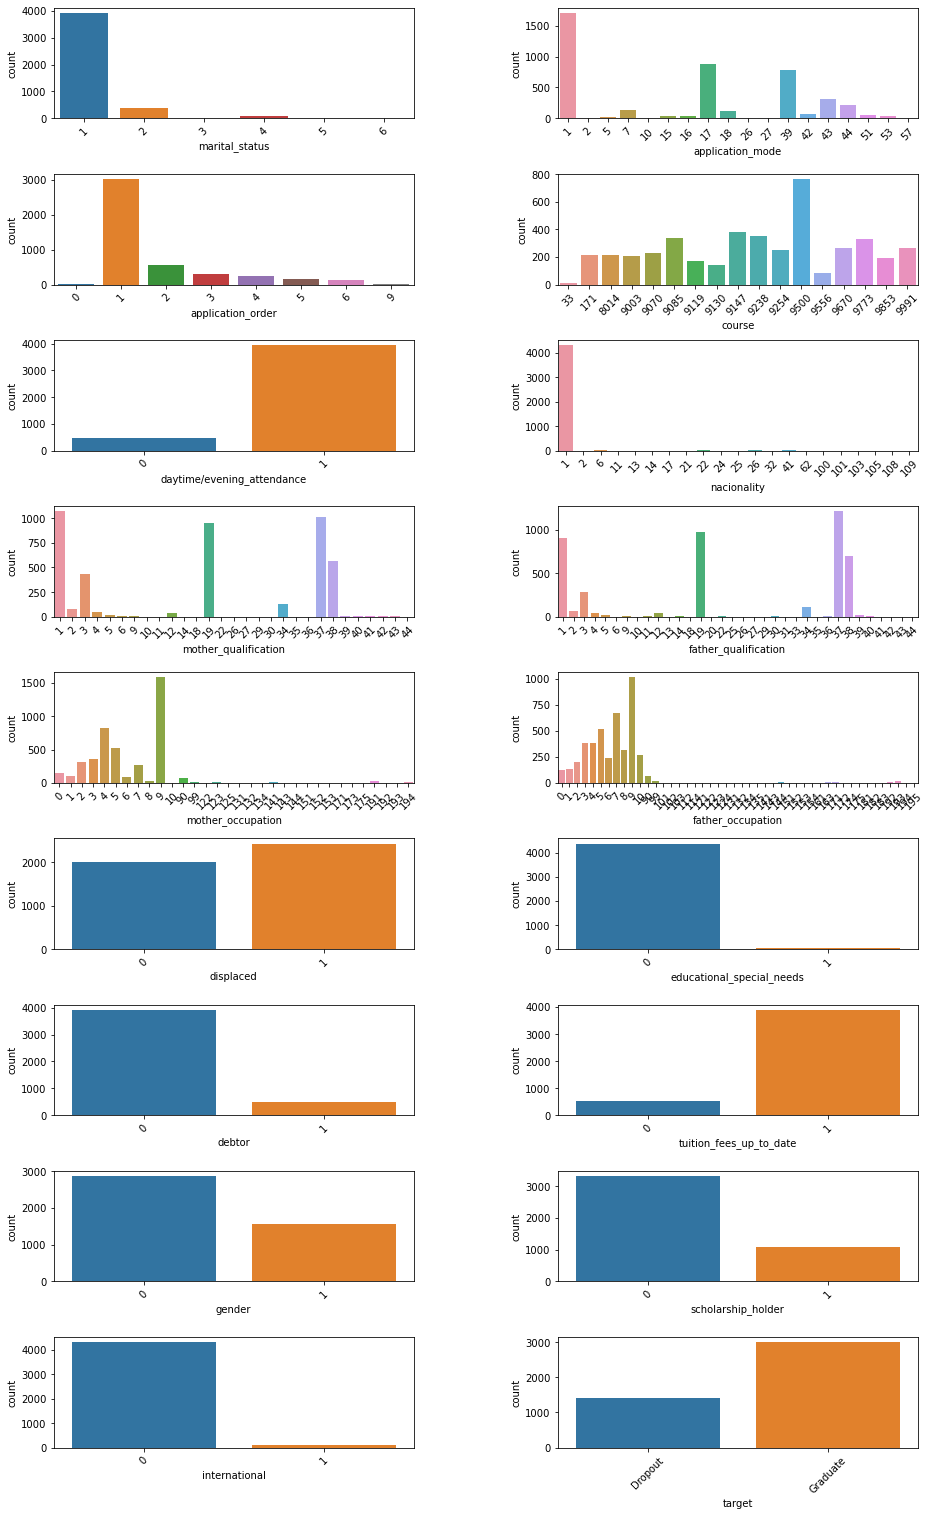

In [50]:
plot_cat(cat)

# X,Y

In [51]:
# Removing rows in cat which we delete in numerical removing outliers
#cat.loc[cat.index.isin(numerical.index),'HandsetPrice'] = numerical.HandsetPrice
cols=cat.columns
cat_df = pd.DataFrame(cat, columns=cols, index =num.index)
num_df=num
print(cat_df.shape)
print(num_df.shape)

(4423, 18)
(4423, 15)


In [136]:
X.isna().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
nacionality                                       0
mother_qualification                              0
father_qualification                              0
mother_occupation                                 0
father_occupation                                 0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
international                                     0
previous_qualification                            0
previous_qualification_(grade)                    0
admission_gr

In [52]:
X=pd.concat([cat_df,num_df], axis=1) 
Y=X['target']
X=X.drop('target',axis=1)
X.shape


(4423, 32)

# Train & Test Split

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizing

In [117]:
def normal(name,X_train,y_train,X_test,y_test):
    
    while ( name not in ['MinMaxScaler','PowerTransformer','StandardScaler']):
        value = input("Incorrect transformer name, please enter a valid one: [1:'MinMaxScaler',2:'PowerTransformer',3:'StandardScaler']")
        if ( value == '1'):
            name = "MinMaxScaler"
        elif ( value == '2'):
            name = "PowerTransformer"
        elif ( value == "3"):
            name = "StandardScaler"
        else:
            name = None
    X_train_df = pd.DataFrame(X_train, columns=X.columns)
    X_test_df  = pd.DataFrame(X_test,  columns=X.columns)
    X_train_num = X_train_df.select_dtypes(include = np.number)
    X_test_num  = X_test_df.select_dtypes(include = np.number)
    X_train_cat = X_train_df.select_dtypes(include = 'object')
    X_test_cat  = X_test_df.select_dtypes(include = 'object')  
    encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
    encoder.fit(X_train_cat)
    
    X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
    cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
    X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols, index = X_train_cat.index)
    X_train_encoded = pd.concat([X_train_encoded_df,X_train_num], axis=1)
    
    X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
    X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,columns=cols, index = X_test_cat.index)
    X_test_encoded = pd.concat([X_test_cat_encoded_df,X_test_num], axis=1)
        
    if name=="MinMaxScaler":
        transformer = MinMaxScaler()
        transformer.fit(X_train_encoded)
    elif name=="PowerTransformer":
        transformer = PowerTransformer()
        transformer.fit(X_train_encoded)
    elif name=='StandardScaler':
        transformer = StandardScaler()
        transformer.fit(X_train_encoded)
        
    X_train_scaled_total = transformer.transform(X_train_encoded)
    X_train_scaled_total_df = pd.DataFrame(X_train_scaled_total, columns = X_train_encoded.columns)
    X_test_scaled_total  = transformer.transform(X_test_encoded)
    X_test_scaled_total_df = pd.DataFrame(X_test_scaled_total, columns= X_test_encoded.columns)

    
    return X_train_scaled_total_df, X_test_scaled_total_df

In [121]:
X_train, X_test=normal('MinMaxScaler',X_train,y_train,X_test,y_test)

/Users/mojgun/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [154]:
sum(X_train.isna().sum())

0

In [157]:
y_train.isna().sum()

0

In [158]:
y_train.shape

(3538,)

In [159]:
y_test.shape

(885,)

# UP Sampling

In [152]:
#We have Class inbalance so we are foing to do Upsampling
data['target'].value_counts()

Graduate    3003
Dropout     1421
Name: target, dtype: int64

In [171]:
trainset = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
# Manual way to Upsampling Dropout:
category_G = trainset[trainset['target']=='Graduate']
print(category_G.shape)
category_D = trainset[trainset['target']== 'Dropout' ]
print(category_D.shape)
category_up=category_D.sample(len(trainset[trainset['target']=='Graduate']),replace=True)
print(category_up.shape)

(2403, 218)
(1135, 218)
(2403, 218)


In [173]:
sum(X_train.isna().sum())

0

In [169]:
# Concatinate and Train & test Spli
#concatinate
trainset_new = pd.concat([category_G, category_up], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train_up = trainset_new.drop(['target'], axis=1)
y_train_up = trainset_new['target']
#data = data.reset_index(drop=True)
print(X_train_up.shape)
print(X_test.shape)
print(y_train_up.shape)
print(y_test.shape)

(4806, 217)
(885, 217)
(4806,)
(885,)


In [170]:
sum(X_train_up.isna().sum())

0

# Predictions

## RandomForestClassifier

In [174]:
rfc = RandomForestClassifier(max_depth=3,
                             min_samples_split=4,
                             min_samples_leaf =2,
                             max_samples=0.5,
                             random_state = 10)
rfc.fit(X_train_up, y_train_up)



RandomForestClassifier(max_depth=3, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=4, random_state=10)

In [179]:
print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(rfc.score(X_train_up, y_train_up)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(rfc.score(X_test, y_test)))

y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train_up)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))
conf_m=confusion_matrix(y_test, y_pred)

The accuracy for the Random Forest in the TRAIN set is 0.81
The accuracy for the Random Forest in the TEST  set is 0.85


Graduate    600
Dropout     285
Name: target, dtype: int64

array([[219,  66],
       [ 68, 532]])

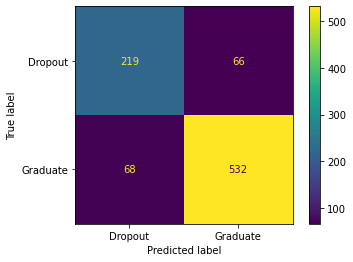

In [181]:
cm_train = confusion_matrix(y_test,y_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train,display_labels=rfc.classes_);
disp.plot()
plt.show()

## Grid Search

In [197]:
recall_scorer = make_scorer(recall_score, greater_is_better=True)
print("The recall for the DecisionTree in the TEST set is  "+ str(round(recall_score(y_test, y_pred,pos_label='Dropout'),2)))

The recall for the DecisionTree in the TEST set is  0.77


In [198]:
from sklearn.model_selection import RandomizedSearchCV

max_depth_choices= [3,4,5,6,7,8,9,10,None] # A list of the possible values of max_depth to try at random
criterion_choices =  ['squared_error','absolute_error'] # A list of the possible values optimization metrics
min_samples_split_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_split to try
min_samples_leaf_choices = [2,3,4,5,6,7,8,9,10] # A list of the possible values of min_samples_leaf to try 
max_features_choices = [2,3,4,5,6] # A list of max_features to use in the Decission tree

random_grid = {'max_depth': max_depth_choices,
               'criterion': criterion_choices,
               'min_samples_split': min_samples_split_choices,
               'min_samples_leaf': min_samples_leaf_choices,
               'max_features': max_features_choices}

In [ ]:
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = random_grid, cv = 5,scoring=recall_scorer)
grid_search.fit(X_train_up, y_train_up)

In [193]:
kappa= make_scorer(cohen_kappa_score)
recall=make_scorer(recall_score)
print("The recall for the DecisionTree in the TEST set is  "+ str(round(recall_score(y_test, y_pred,pos_label='Dropout'),2)))
print("The kappa for the DecisionTree in the TEST set is  "+ str(round(cohen_kappa_score(y_test, y_pred),2)))

The recall for the DecisionTree in the TEST set is  0.77
The kappa for the DecisionTree in the TEST set is  0.65
